# Problem 1

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


DATASET: 50_Startups.csv

In [1]:
# IMPORTING DATASET
import pandas as pd
startups=pd.read_csv("50_Startups.csv")
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


here,profit is dependent variable and others are independent variable.

# EDA

In [2]:
# checking the data types
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
# checking the null values
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
# checking the duplicates
startups.duplicated().sum()

0

In [5]:
#Renaming the columns
startups1=startups.rename({"R&D Spend":"RDS","Administration":"ADMS","Marketing Spend":"MKTS"},axis=1)
startups1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
# Correlation Analysis
startups1.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


here, we can see there is strong correlation between variables Profit & RDS i.e 0.972

Also, from scatterplot we can see the strong correlation between variables Profit & RDS .

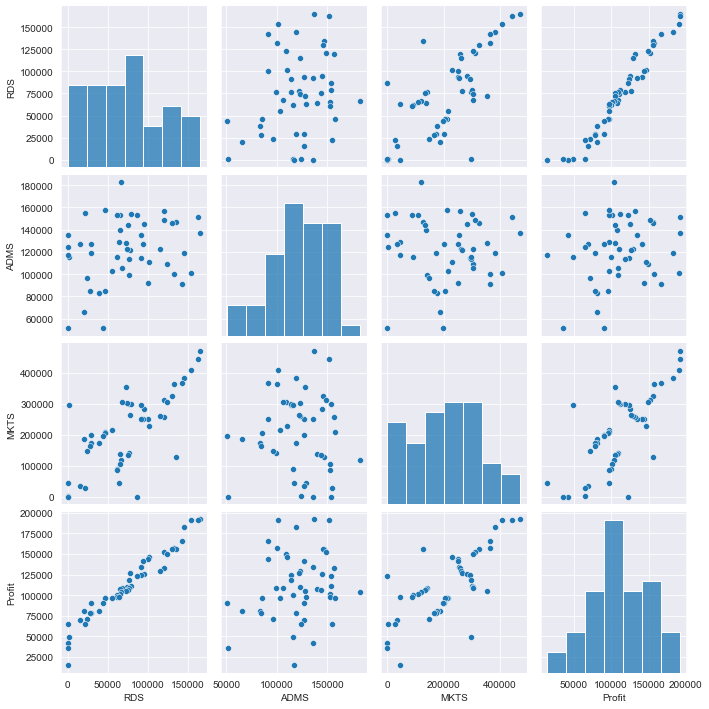

In [7]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(startups1)

# Model Building


In [8]:
import statsmodels.formula.api as smf
model=smf.ols("Profit~RDS+ADMS+MKTS",data=startups1).fit()
model

# Model Testing

In [9]:
#Finding the coefficients, p-value, t-value, R-sq value
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 09 May 2023   Prob (F-statistic):           4.53e-30
Time:                        16:35:25   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p-value for independent variables ADMS & MKTS is 0.602 & 0.105 resp. i.e > 0.05 (alpha) so this variables are not significant.
p-value for independent variable RDS is < 0.05, so RDS is significant.


Now. Here we get ADMS & MKTS, these variables is not significant so, there is chances of removing these variables. But before removing i do cross check, so for this independently check, whether the ADMS & MKTS are significant or not.


In [10]:
# Simple Linear Regression Model
startups1.columns

Index(['RDS', 'ADMS', 'MKTS', 'State', 'Profit'], dtype='object')

In [11]:
# Build SLR and MlR models for insignificant variables "ADMS" and "MKTS"
# ALSO, find their tvalues and pvalues

In [12]:
slr_a=smf.ols("Profit~ADMS",data=startups1).fit()
slr_a.tvalues,slr_a.pvalues

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [13]:
slr_m=smf.ols("Profit~MKTS",data=startups1).fit()
slr_m.tvalues,slr_m.pvalues

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [14]:
slr_am=smf.ols("Profit~ADMS+MKTS",data=startups1).fit()
slr_am.tvalues,slr_am.pvalues

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

# Model Validation

In [15]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMS+MKTS",data=startups1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=startups1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=startups1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

In [16]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Normal Q-Q plot of residuals')

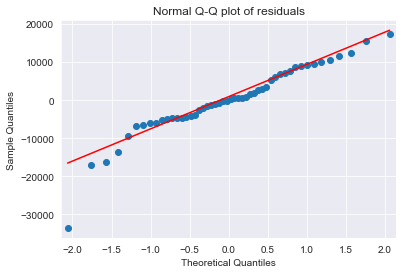

In [17]:
sm.qqplot(model.resid,line="q")
import matplotlib.pyplot as plt
plt.title("Normal Q-Q plot of residuals")

Not all observations are lined on this red line There is one observation are away from

line are called as outlier / influencer.

In [18]:
import numpy as np
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [19]:
# Residual Plot for Homoscedasticity
def standard_values(vals):
    return (vals-vals.mean())/vals.std()

Text(0, 0.5, 'standardized residual values')

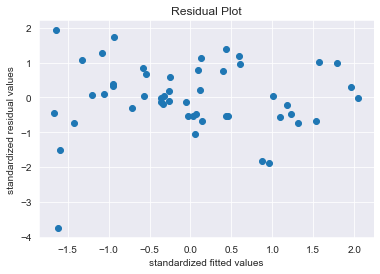

In [20]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')

there is no pattern

# To test for Errors or Residual and Regressor

eval_env: 1


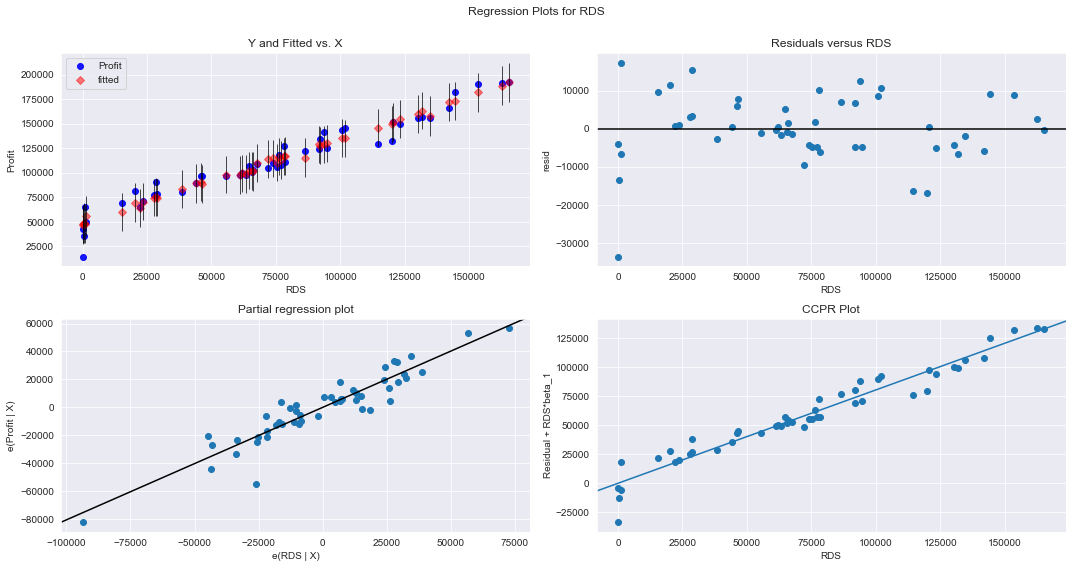

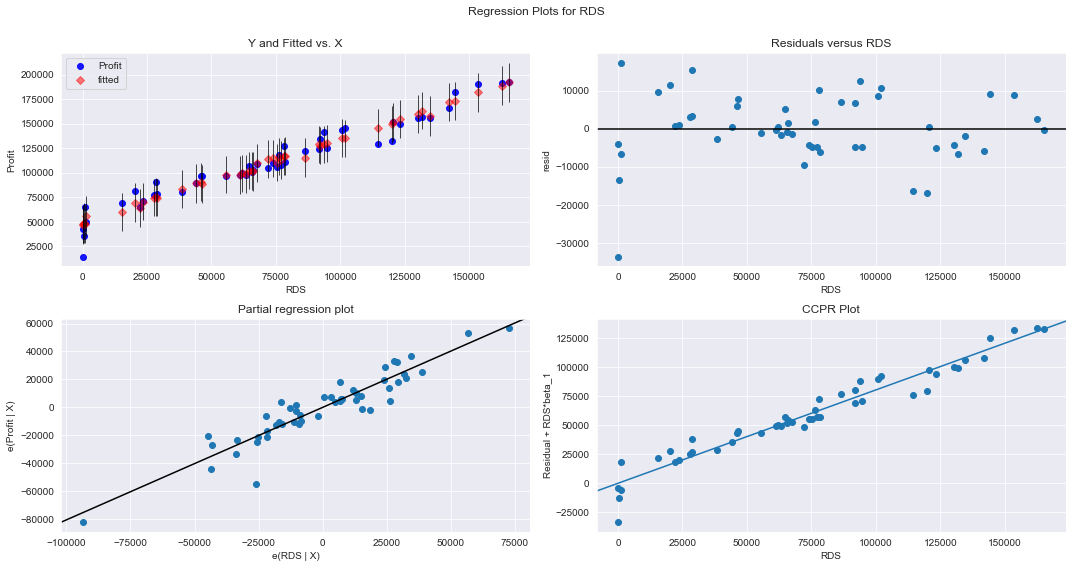

In [21]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)

eval_env: 1


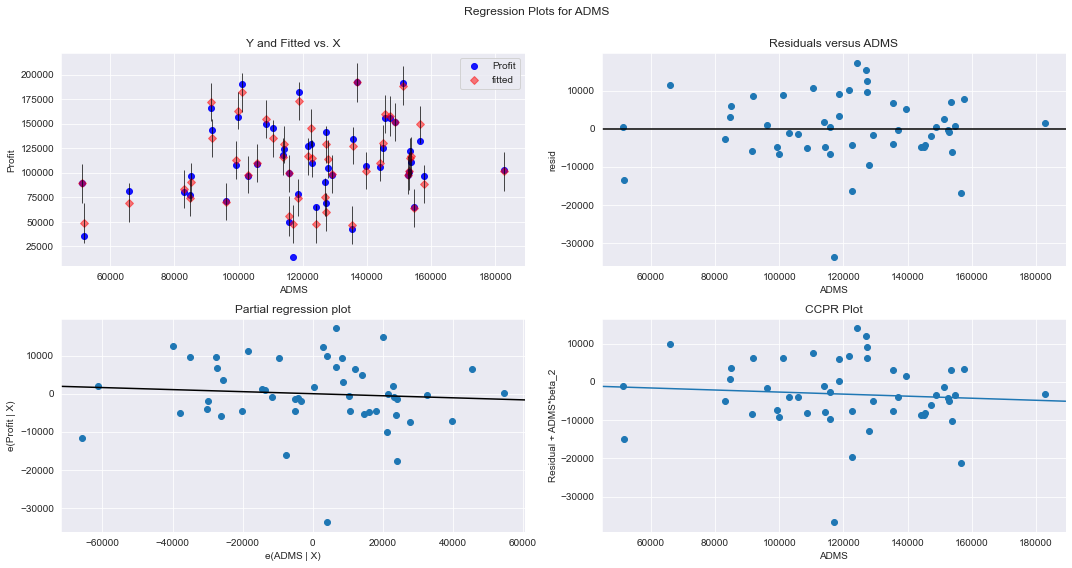

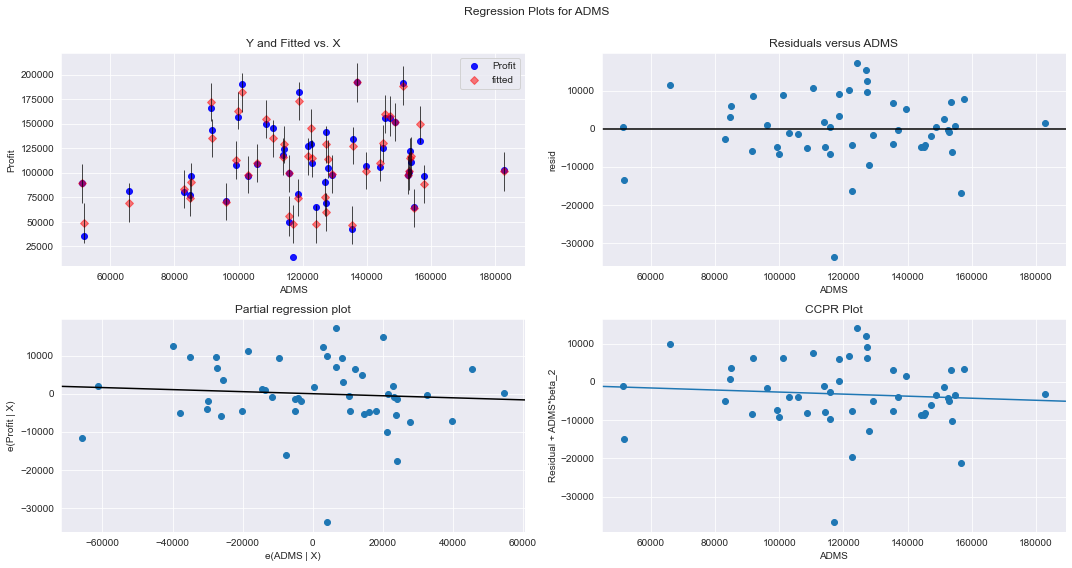

In [22]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)

eval_env: 1


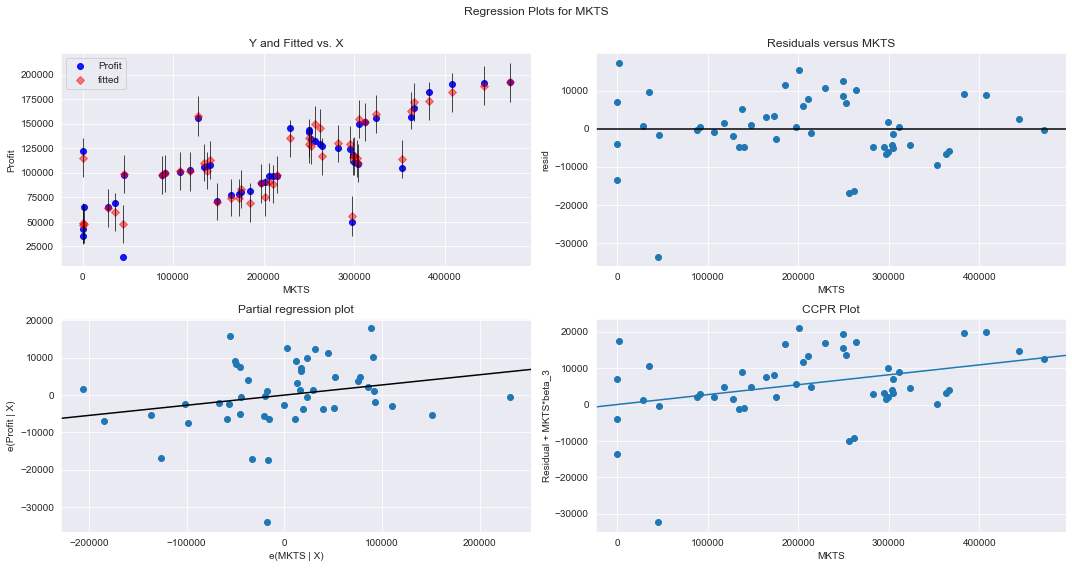

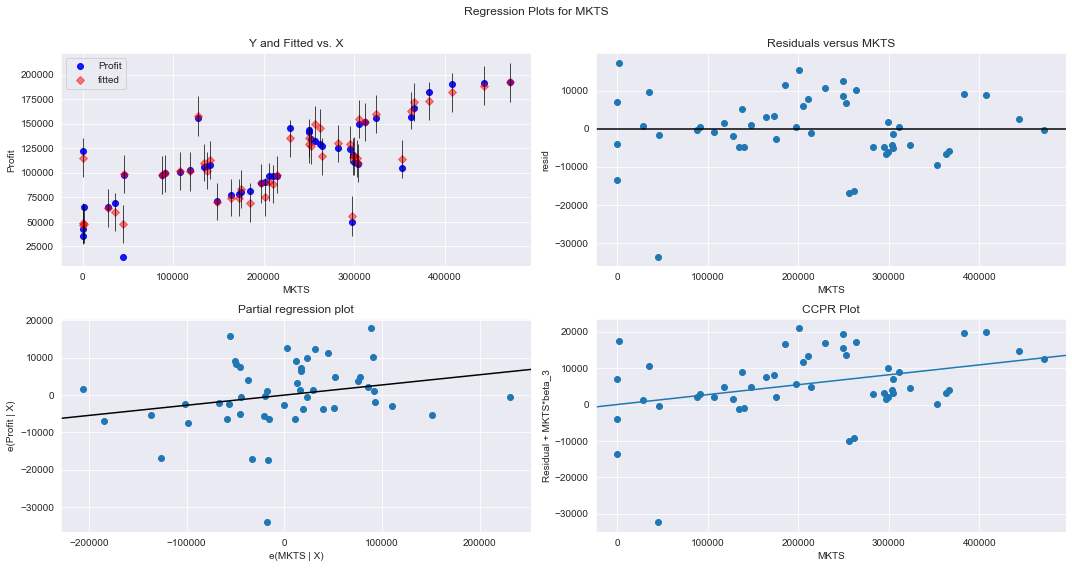

In [23]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)

# Model Deletion Diagnostics
# Detecting Influencers and Outliers
# 1. Cook's Distance

In [24]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

Text(0, 0.5, 'Cooks Distance')

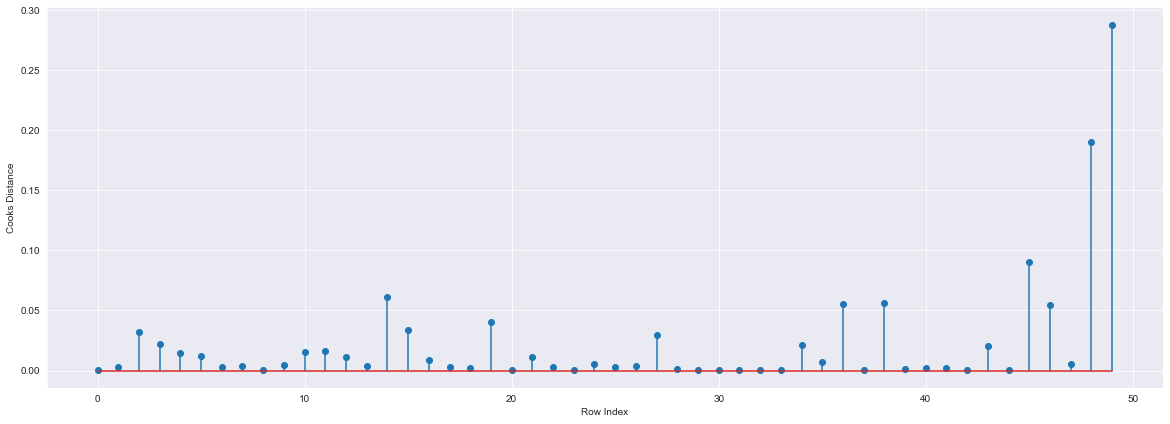

In [25]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startups1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [26]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

# 2. High Influence plots 


In [27]:
from statsmodels.graphics.regressionplots import influence_plot

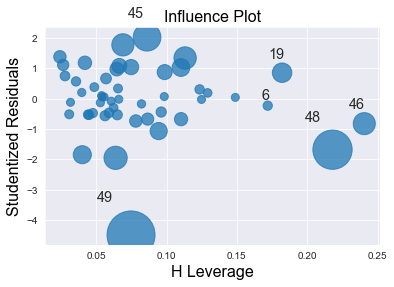

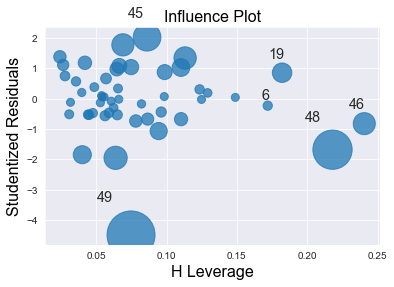

In [28]:
influence_plot(model)

In [29]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=startups1.shape[1]
n=startups1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

so, any observation beyond the cutoff value called as outliers.

In [47]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

In [30]:
# i want to see 49th observation
startups1[startups1.index.isin([49])]

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the model

In [31]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data1=startups1.drop(startups1.index[[49]],axis=0).reset_index(drop=True)
data1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Deletion Diagnostics and Final Model

In [32]:
model1=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()

In [33]:
while model1.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model1=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()
        (c,_)=model1.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data1=data1.drop(data1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data1
    else:
        final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.9831149926392769
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improv

In [34]:
final_model.rsquared

0.9882757054424702

In [35]:
# Model Prediction
data1

,RDS,ADMS,MKTS,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


In [36]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':50000,"ADMS":120000,"MKTS":200000},index=[0])
new_data

,RDS,ADMS,MKTS
0,50000,120000,200000


In [37]:
# Manual Prediction of Price
final_model.predict(new_data)

0    94586.861288
dtype: float64

In [38]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data1)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

# Table with R^2 value


In [39]:
data2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(data2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276


# Problem:2

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)


Dataset: "ToyotaCorolla.csv"

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [178]:
# importing dataset
# As its unable to decode I have used encoding
tc=pd.read_csv("ToyotaCorolla.csv", encoding='latin1')
tc

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [179]:
# To check the Columns
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [180]:
tc.shape

(1436, 38)

In [181]:
cars=tc[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
cars.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [182]:
# To check the data types
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [183]:
# To check the null values
cars.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [184]:
# To cehck the duplicated values
cars[cars.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [185]:
cars.duplicated().sum()

1

In [186]:
cars1=cars.rename({"Age_08_04" : "Age","Quarterly_Tax" : "QT","Weight":"WT"}, axis='columns')
cars1.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [187]:
cars1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
WT,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


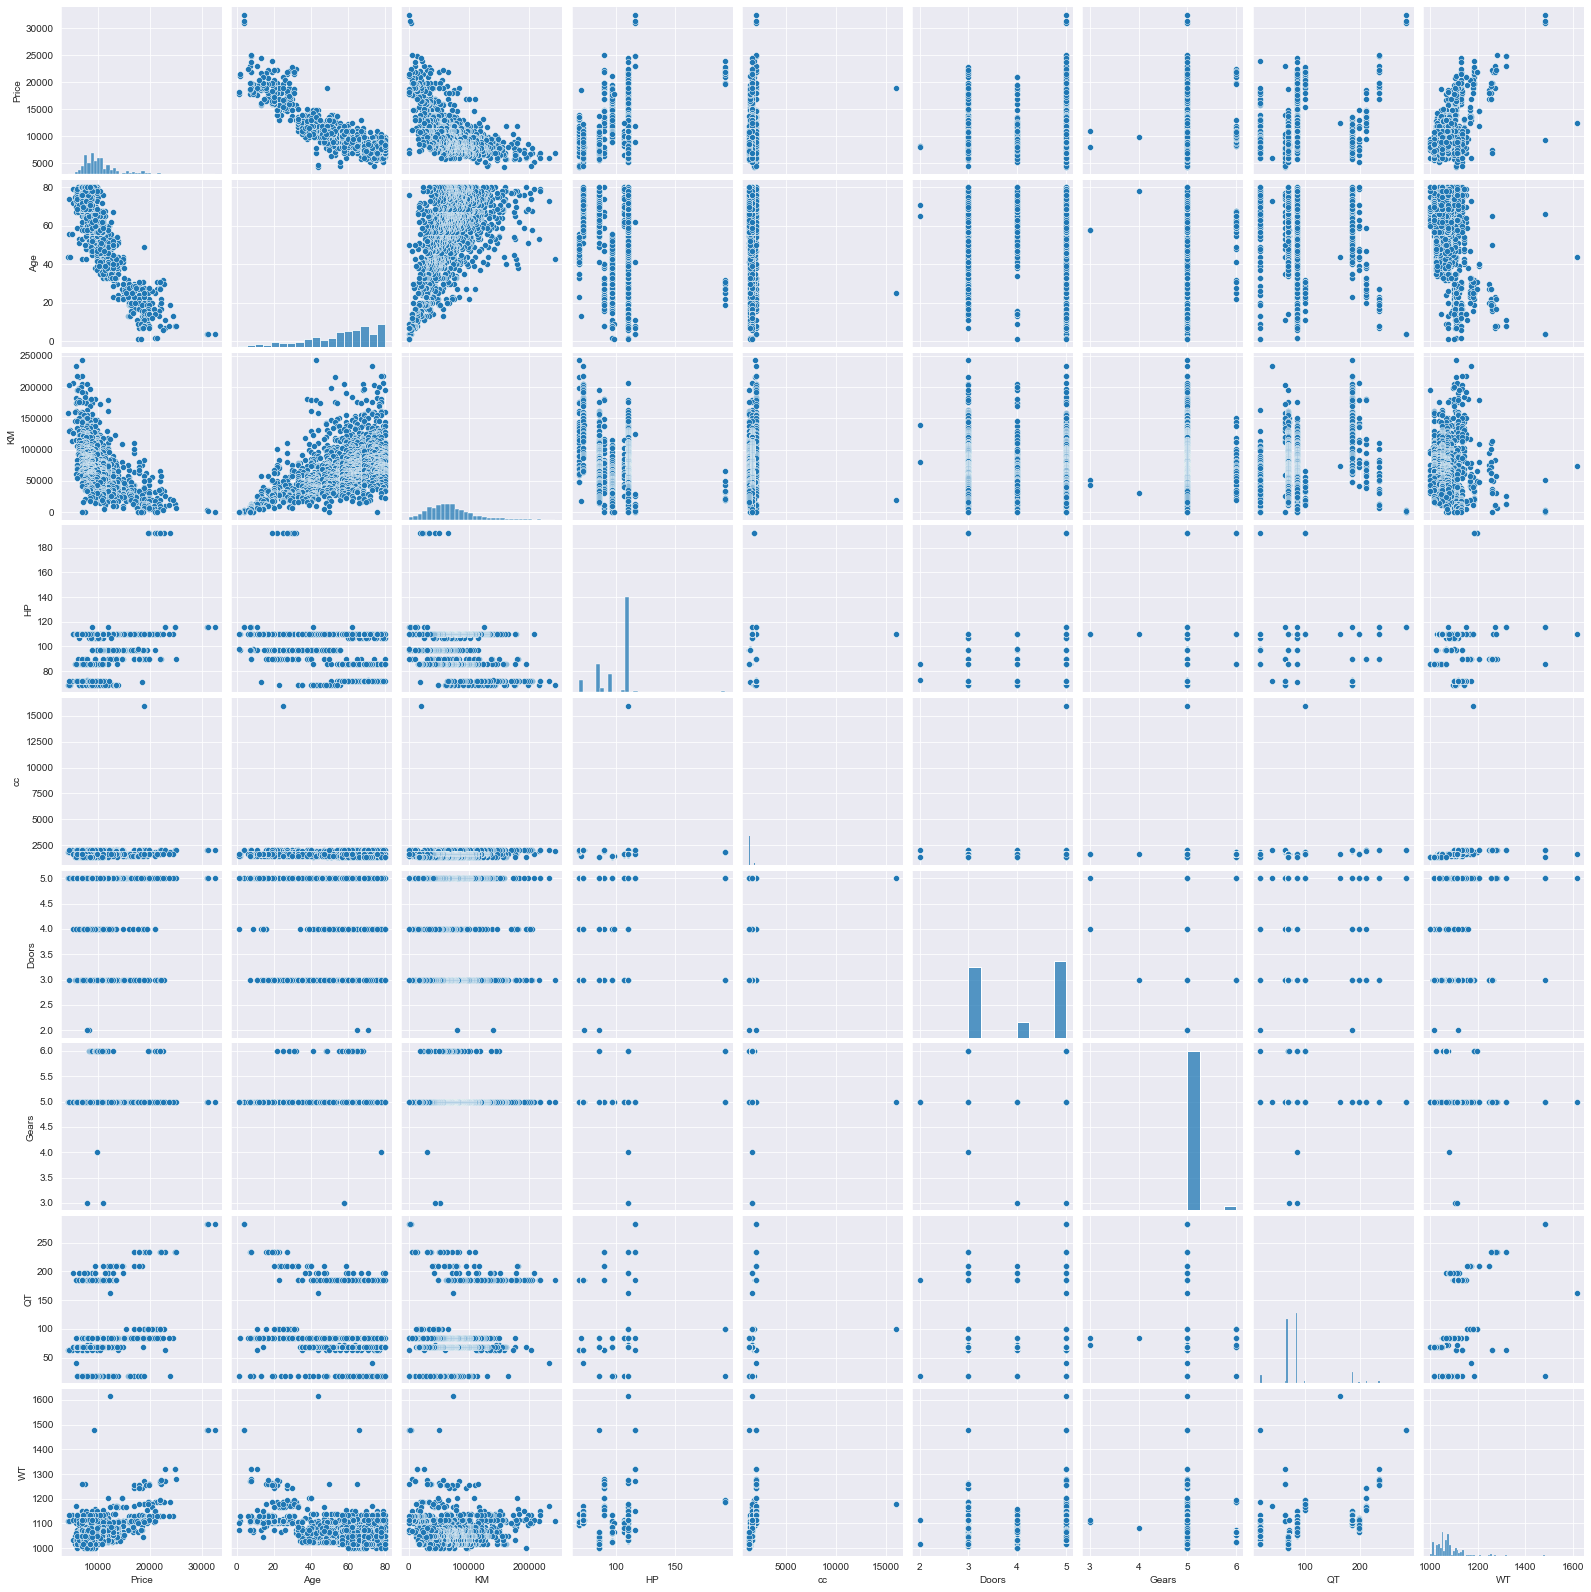

In [188]:
sns.pairplot(cars1)

# Model Building

In [189]:
import statsmodels.formula.api as smf
cars1.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'WT'], dtype='object')

In [190]:
# Creating the model
MODEL=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+WT',data=cars1).fit()
MODEL

In [192]:
# Finding the coefficients, P_value, t_value and R_squared value
MODEL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 09 May 2023   Prob (F-statistic):               0.00
Time:                        18:44:08   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
WT            16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression Model

In [193]:
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
# Also find their tvalues and pvalues

In [194]:
MODEL_c=smf.ols('Price~cc',data=cars1).fit()
print(MODEL_c.pvalues,'\n',MODEL_c.summary())

Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64 
                             OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.55e-06
Time:                        18:45:24   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [195]:
MODEL_d=smf.ols('Price~Doors', data=cars1).fit()
print(MODEL_d.pvalues,'\n',MODEL_d.summary())

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64 
                             OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.46e-12
Time:                        18:46:13   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [196]:
MODEL_cd=smf.ols('Price~Doors+cc', data=cars1).fit()
print(MODEL_cd.pvalues,'\n',MODEL_cd.summary())

Intercept    1.056885e-34
Doors        1.373469e-11
cc           1.521992e-05
dtype: float64 
                             OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.15e-15
Time:                        18:46:45   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

# Calculating VIF

In [197]:
cars1.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'WT'], dtype='object')

In [200]:
rsq_Age = smf.ols('Age~KM+HP+cc+Doors+Gears+QT+WT',data=cars1).fit().rsquared  
vif_Age= 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+cc+Doors+Gears+QT+WT',data=cars1).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+cc+Doors+Gears+QT+WT',data=cars1).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Age+HP+KM+Doors+Gears+QT+WT',data=cars1).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Age+HP+KM+cc+Gears+QT+WT',data=cars1).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+HP+KM+Doors+cc+QT+WT',data=cars1).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears)

rsq_QT = smf.ols('QT~Age+HP+KM+Doors+Gears+cc+WT',data=cars1).fit().rsquared  
vif_QT = 1/(1-rsq_QT)

rsq_WT = smf.ols('WT~Age+HP+KM+Doors+Gears+QT+cc',data=cars1).fit().rsquared  
vif_WT = 1/(1-rsq_WT)


# Storing vif values in a data frame
df3 = {'Variables':['Age','KM','HP','cc','Doors','Gears','QT','WT'],'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QT,vif_WT,]}
Vif_df3 = pd.DataFrame(df3)  
Vif_df3

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,WT,2.516420


# Residual Analysis
# Test for Normality of Residuals (Q-Q Plot)

Text(0.5, 1.0, 'Q-Q Plot')

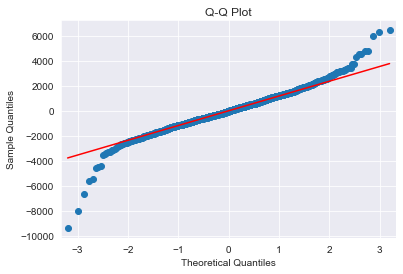

In [201]:
import statsmodels.api as sm
qqplot1=sm.qqplot(MODEL.resid,line='q')
plt.title('Q-Q Plot')

In [202]:
list(np.where(MODEL.resid<-6000))

[array([221, 601, 960], dtype=int64)]

# Residual Plot for Homoscedasticity

In [203]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

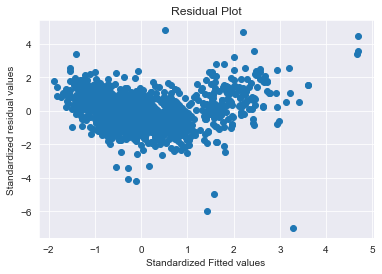

In [204]:
plt.scatter(get_standardized_values(MODEL.fittedvalues),
            get_standardized_values(MODEL.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()


# To test for Errors or Residual and Regressor

eval_env: 1


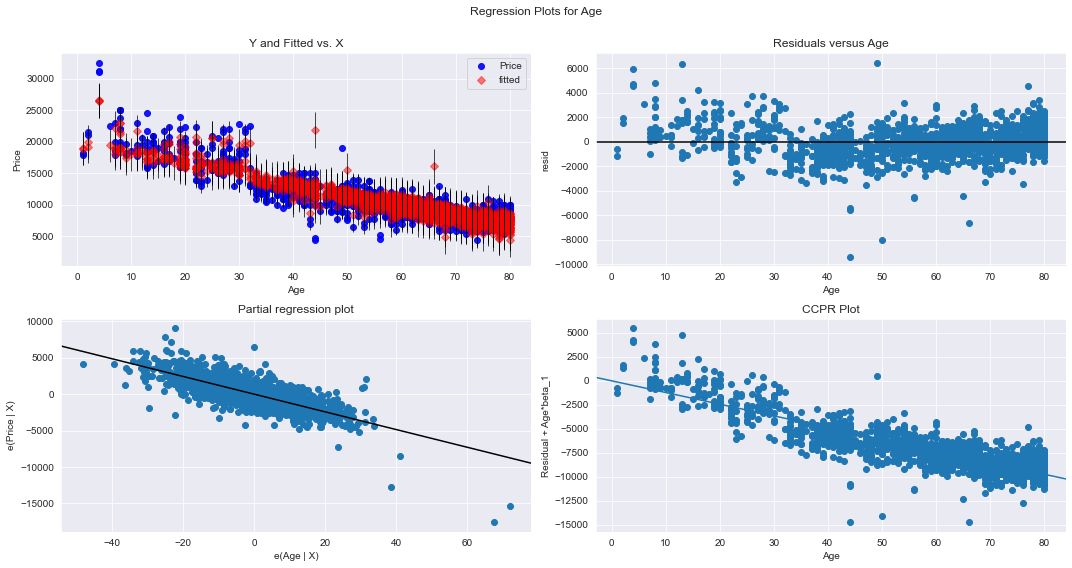

In [205]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(MODEL,'Age',fig=fig)
plt.show()

eval_env: 1


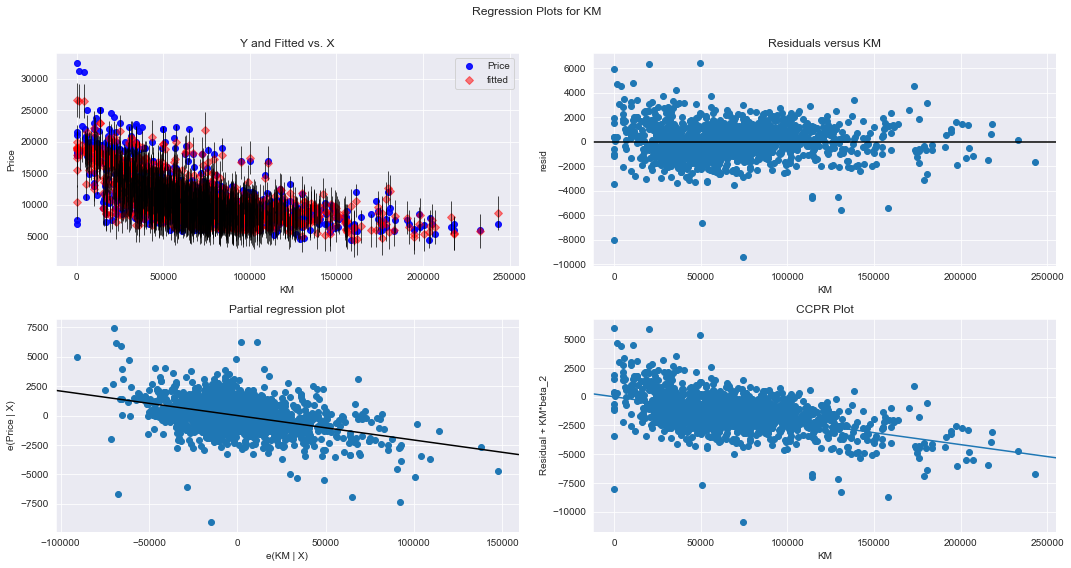

In [206]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(MODEL,'KM',fig=fig)
plt.show()

eval_env: 1


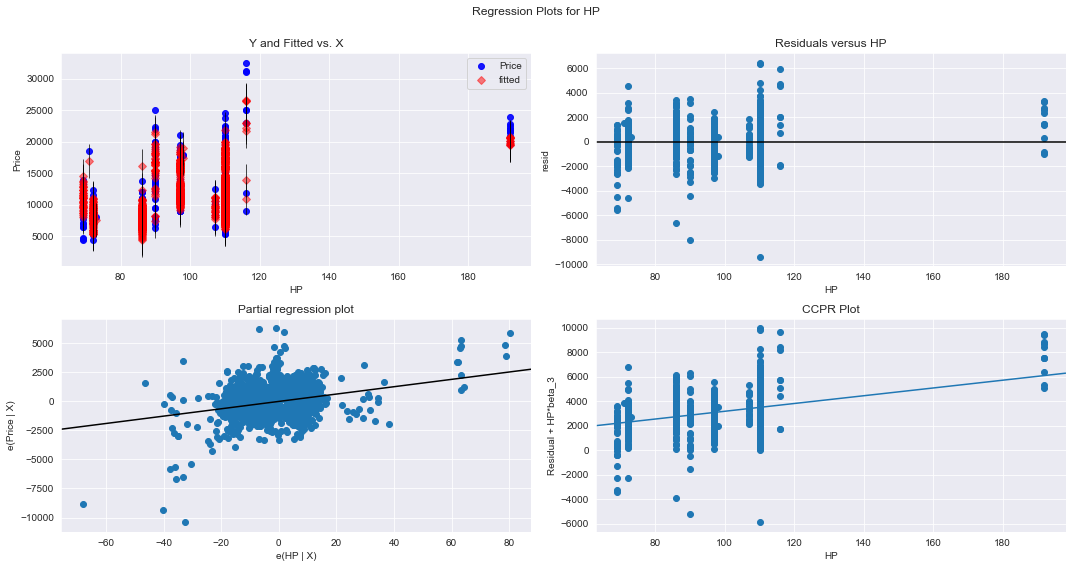

In [207]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(MODEL,'HP',fig=fig)
plt.show()

eval_env: 1


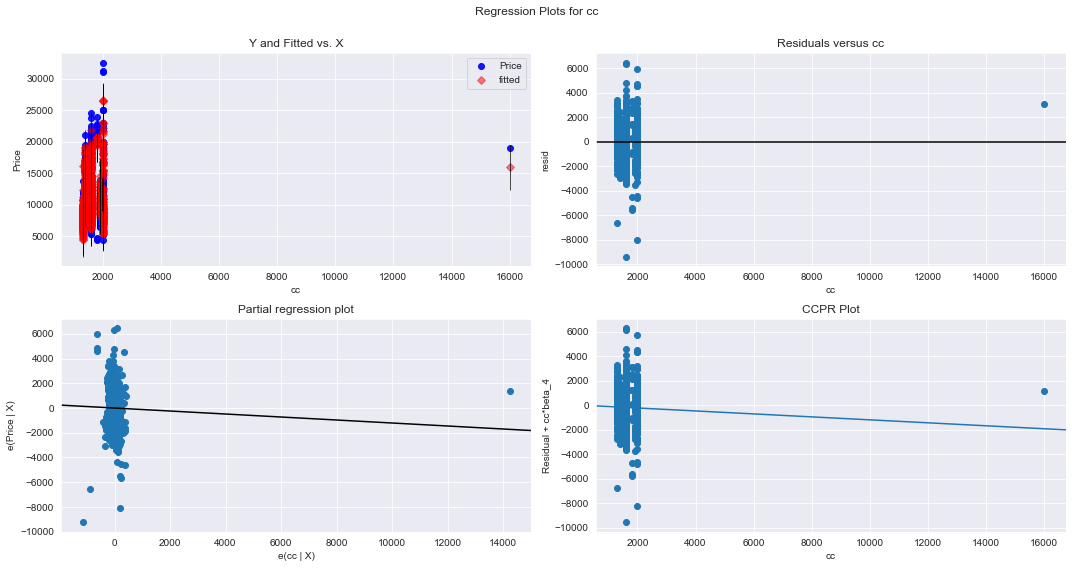

In [208]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(MODEL,'cc',fig=fig)
plt.show()

eval_env: 1


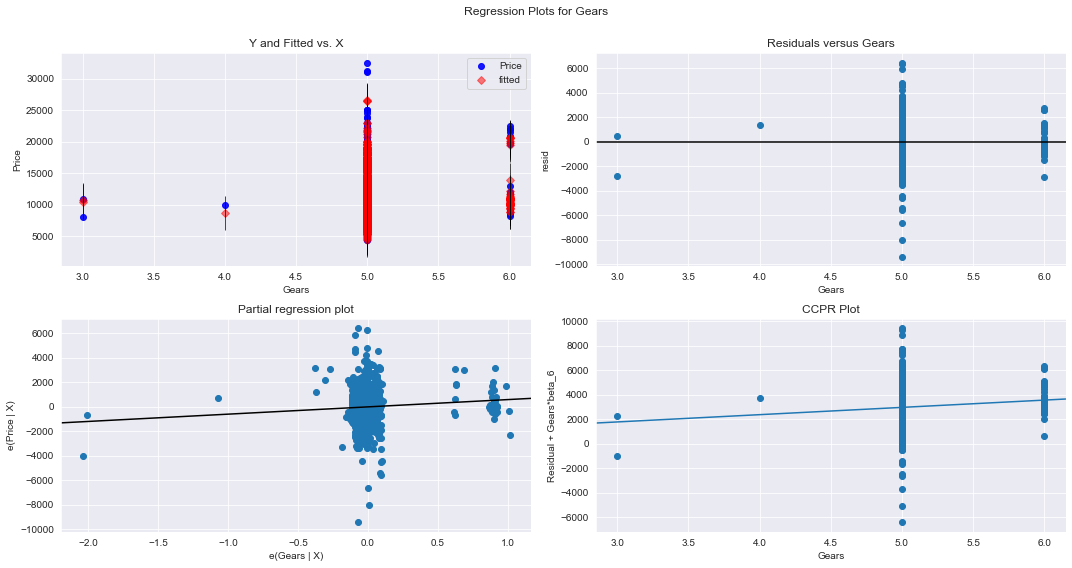

In [209]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(MODEL,'Gears',fig=fig)
plt.show()

eval_env: 1


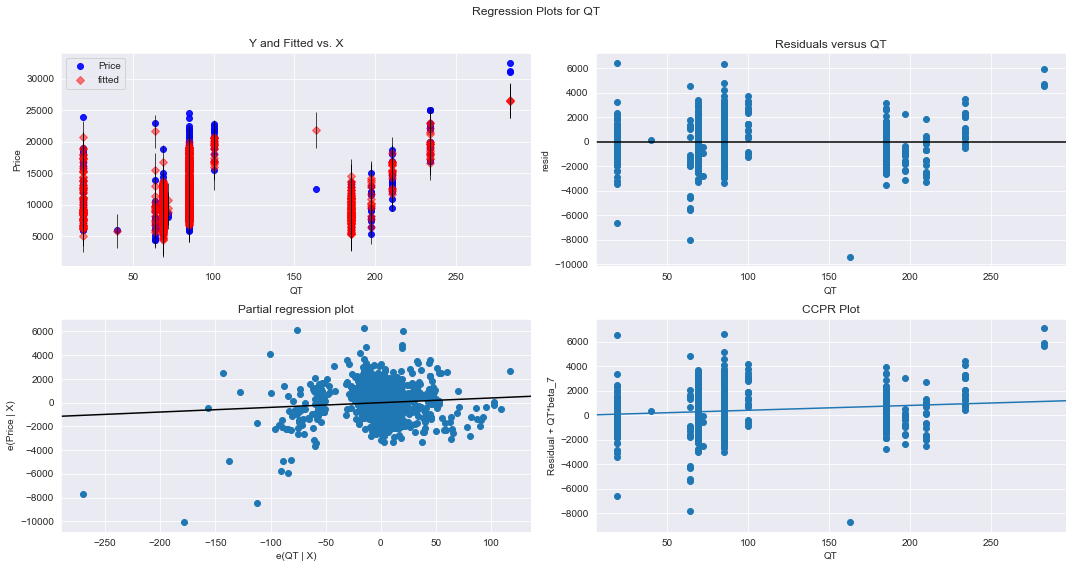

In [210]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(MODEL,'QT',fig=fig)
plt.show()

eval_env: 1


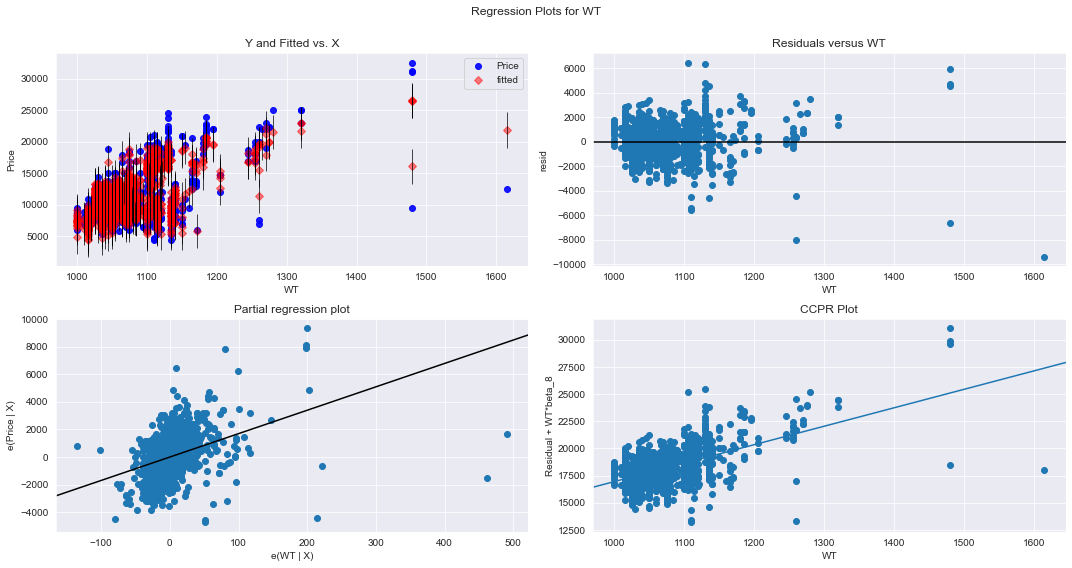

In [211]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(MODEL,'WT',fig=fig)
plt.show()

# Model Detection Diagnostics
# Detecting Influencers and outliers
# 1. Cook's Distance

In [212]:
MODEL_influence=MODEL.get_influence()
(c4, _) = MODEL_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

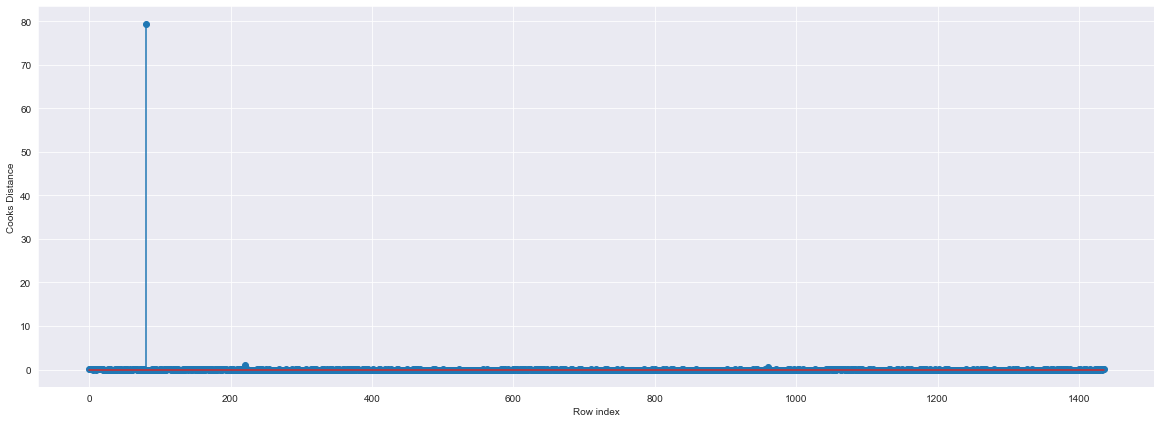

In [213]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars1)), np.round(c4, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [214]:
#index and value of influencer where c4 > 0.5
np.argmax(c4),np.max(c4)

(80, 79.52010624138055)

# 2. High Influence plots

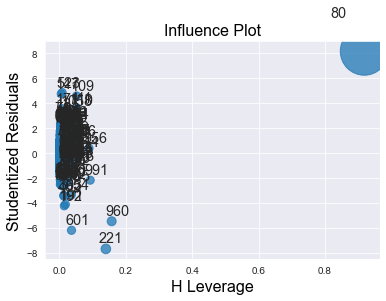

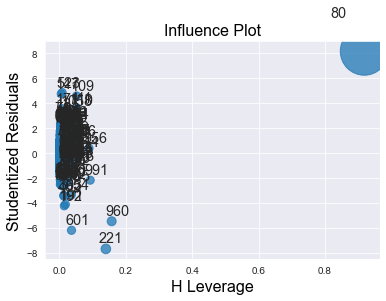

In [216]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(MODEL)

In [217]:
# Leverage cutoff value
# Where K= No. of features/Columns & n= No. of data points
k = cars1.shape[1]
n = cars1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [218]:
cars1[cars.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the model

In [219]:
# Creating a copy of data so that original dataset is not affected
cars_new=cars1.copy()
cars_new

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [220]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
cars2=cars_new.drop(cars_new.index[[80]],axis=0).reset_index(drop=True)
cars2

,Price,Age,KM,HP,cc,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Model Deletion Diagnostics and Final Model

In [221]:
while np.max(c4)>0.5 :
    MODEL=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+WT',data=cars2).fit()
    (c4,_)=MODEL.get_influence().cooks_distance
    c4
    np.argmax(c4) , np.max(c4)
    cars2=cars2.drop(cars2.index[[np.argmax(c4)]],axis=0).reset_index(drop=True)
    cars2
else:
    FINAL_MODEL=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+WT',data=cars2).fit()
    FINAL_MODEL.rsquared , FINAL_MODEL.aic
    print("Thus model accuracy is improved to",FINAL_MODEL.rsquared)

Thus model accuracy is improved to 0.8894191849749751


In [222]:
if np.max(c)>0.5:
    MODEL=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+WT',data=cars2).fit()
    (c4,_)=MODEL.get_influence().cooks_distance
    c4
    np.argmax(c4) , np.max(c4)
    cars2=cars2.drop(cars2.index[[np.argmax(c4)]],axis=0).reset_index(drop=True)
    cars2 
elif np.max(c4)<0.5:
    FINAL_MODEL=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+WT',data=cars2 ).fit()
    FINAL_MODEL.rsquared , FINAL_MODEL.aic
    print("Thus model accuracy is improved to",FINAL_MODEL.rsquared)

Thus model accuracy is improved to 0.8894191849749751


In [223]:
FINAL_MODEL.rsquared

0.8894191849749751

# Model Prediction

In [224]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':15,"KM":50000,"HP":90,"cc":1200,"Doors":4,"Gears":5,"QT":69,"WT":1012},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,QT,WT
0,15,50000,90,1200,4,5,69,1012


In [225]:
# Manual Prediction of Price
FINAL_MODEL.predict(new_data)

0    14541.803979
dtype: float64

In [226]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=FINAL_MODEL.predict(cars2)
pred_y

0       16351.012991
1       15891.824421
2       16334.021007
3       16002.080259
4       15889.835926
            ...     
1427     9161.797882
1428     8536.169181
1429     8681.605150
1430     8793.704782
1431    10863.423359
Length: 1432, dtype: float64